In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


filename = "../data/cbioportal/cll_broad_2022_clinical_data.csv"

df = pd.read_csv(filename)
original_df = df.copy()

df = df[df['CANCER_TYPE_DETAILED'] == 'Chronic Lymphocytic Leukemia/Small Lymphocytic Lymphoma']


# dispaly(df[df[¸'SEX'].isna()]) # most columns are missing data, so we drop rows with missing
df.dropna(subset=['SEX'], inplace=True) 
# display(df['TREATMENT_STATUS'].isna().sum())
# display(df['TREATMENT_AFTER_SAMPLING'].value_counts())

treatments = ["Chemo + Ab", "Chemo + no Ab", "Ab + no chemo", "Unknown"]
df['TREATMENT_AFTER_SAMPLING'] = df['TREATMENT_AFTER_SAMPLING'].fillna("Unknown")
df['TREATMENT_AFTER_SAMPLING'] = df['TREATMENT_AFTER_SAMPLING'].apply(lambda x: x if x in treatments else "Targeted Therapy")

# Fill missing values in categorical columns with "Unknown"
categorical_cols = ["PRIOR_TREATMENT_CATEGORY", "IGHV_MUTATION_STATUS", "COHORT"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Bin ages into categories
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=[0,40,50,60,70,80,90,100], labels=["<40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"])

df = df[['patientId', 'COHORT', 'AGE', 'AGE_SAMPLING', 'AGE_GROUP', 'SEX', 'PRIOR_TREATMENT_CATEGORY', 'TREATMENT_AFTER_SAMPLING', 'TREATMENT_STATUS', 'OS_MONTHS', 'OS_STATUS', 'FFS_MONTHS', 'FFS_STATUS', 'CLL_EPITYPE']]

In [63]:
df.isna().sum()

patientId                     0
COHORT                        0
AGE                         132
AGE_SAMPLING                  0
AGE_GROUP                   132
SEX                           0
PRIOR_TREATMENT_CATEGORY      0
TREATMENT_AFTER_SAMPLING      0
TREATMENT_STATUS              0
OS_MONTHS                    82
OS_STATUS                    82
FFS_MONTHS                   82
FFS_STATUS                   82
CLL_EPITYPE                  87
dtype: int64

In [64]:
print(sns.color_palette("coolwarm").as_hex())
sns.color_palette("coolwarm")

['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']


[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_68476/3610853131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="SEX", palette="coolwarm")


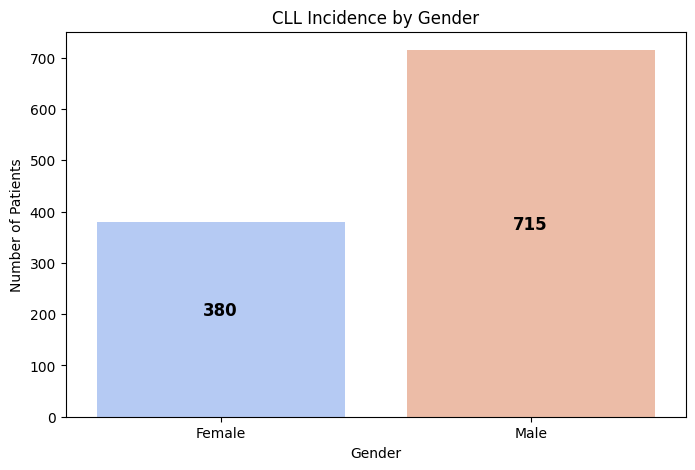

SEX
Male      715
Female    380
Name: count, dtype: int64

In [65]:
### 1. CLL Incidence by Gender ###
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="SEX", palette="coolwarm")
# Add count labels inside the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert count to integer
                (p.get_x() + p.get_width() / 2, p.get_height()/2),  # Position
                ha='center', va='bottom',  # Centered alignment
                fontsize=12, fontweight='bold', color='black')  # Formatting

txt = "CLL Incidence by Gender"
plt.title(txt)
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/cll_incidence_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()
display(df['SEX'].value_counts())

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_68476/2501553482.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["AGE"], bins=20, kde=True, palette="coolwarm", color=[154/255, 187/255, 1])


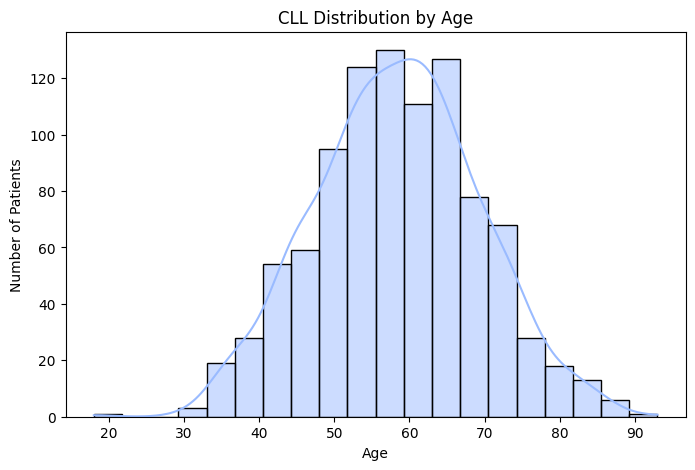

In [66]:
### 2. CLL Distribution by Age ###
plt.figure(figsize=(8, 5 ))
sns.histplot(df["AGE"], bins=20, kde=True, palette="coolwarm", color=[154/255, 187/255, 1])
txt = "CLL Distribution by Age"
plt.title(txt)
plt.xlabel("Age")
plt.ylabel("Number of Patients")
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/cll_distribution_by_age.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_68476/3730695298.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle(xy=(80,50), color='black', alpha=0.3, lw=4, edgecolor='black', fill=False)


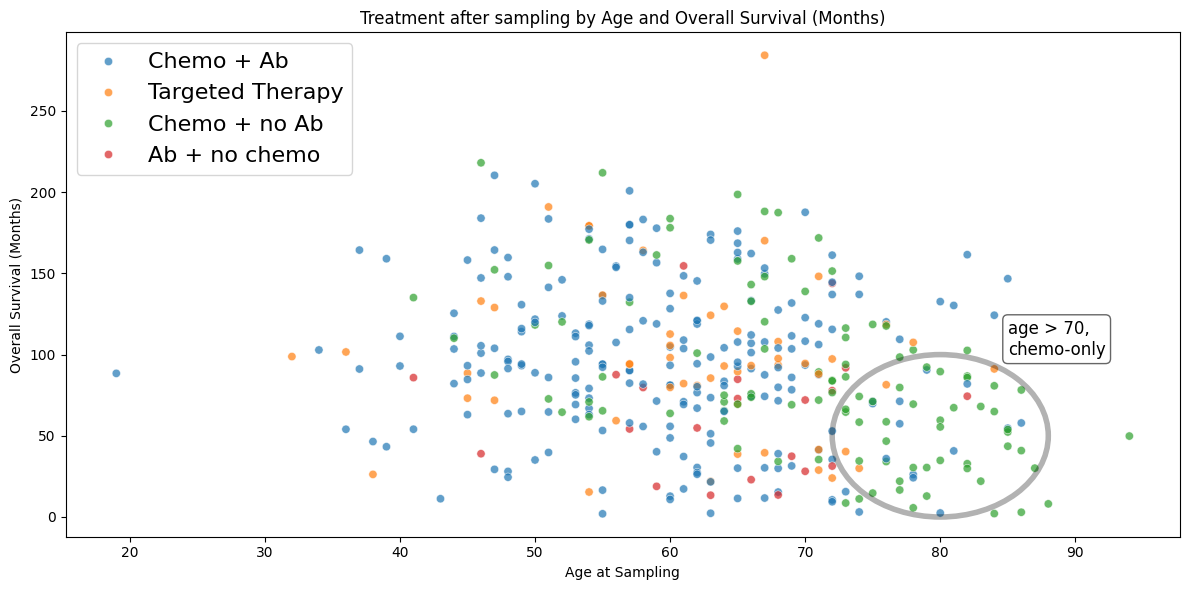

In [67]:
plt.figure(figsize=(12, 6))
new_df = df[df['TREATMENT_AFTER_SAMPLING'] != "Unknown"]
ax = sns.scatterplot(data=new_df, x="AGE_SAMPLING", y="OS_MONTHS", hue="TREATMENT_AFTER_SAMPLING", palette="tab10", alpha=0.7)

# Add a circle annotation (bottom right area)
circle = patches.Circle(xy=(80,50), color='black', alpha=0.3, lw=4, edgecolor='black', fill=False)
circle.set_height(100)
circle.set_width(16)
ax.add_patch(circle)

# Add text label for the circle
plt.text(85, 100, "age > 70,\nchemo-only", fontsize=12, color='black', 
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.3'))


txt = "Treatment after sampling by Age and Overall Survival (Months)"
# txt = "Figure 3. Treatment after sampling by Age and Overall Survival (Months)"
plt.title(txt)
plt.xlabel("Age at Sampling")
plt.ylabel("Overall Survival (Months)")
plt.legend(loc='upper left', prop={'size': 16})
# Adjust layout to prevent cutting off labels
plt.tight_layout()
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/treatment_after_sampling_by_age_and_os.png", dpi=300, bbox_inches="tight")
plt.show()

In [68]:
# df[(df['TREATMENT_AFTER_SAMPLING'] == "Chemo + no Ab") & (df['AGE_SAMPLING'] > 70)][['OS_MONTHS', 'OS_STATUS']]
# df[(df['TREATMENT_AFTER_SAMPLING'] == "Chemo + no Ab") & (df['AGE_SAMPLING'] > 70)]['OS_STATUS'].value_counts()

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_68476/882568252.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  outcome_pivot = new_df.pivot_table(index=['COHORT', 'TREATMENT_AFTER_SAMPLING'], columns="AGE_GROUP", values="OS_MONTHS", aggfunc="mean")


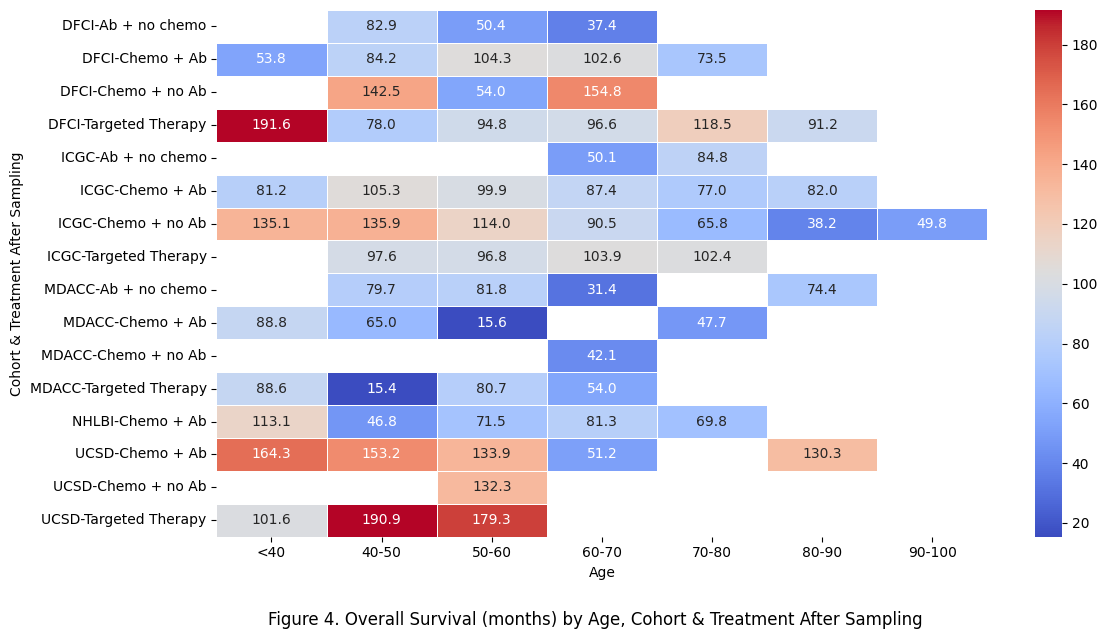

In [69]:
# Preparing the data for heatmap
new_df = df[df['TREATMENT_AFTER_SAMPLING'] != "Unknown"]
outcome_pivot = new_df.pivot_table(index=['COHORT', 'TREATMENT_AFTER_SAMPLING'], columns="AGE_GROUP", values="OS_MONTHS", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(outcome_pivot, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".1f")
# txt = "Overall Survival (months) by Age, Cohort & Treatment After Sampling"
txt = "Figure 4. Overall Survival (months) by Age, Cohort & Treatment After Sampling"
# plt.title(txt)
plt.xlabel("Age")
plt.ylabel("Cohort & Treatment After Sampling")
plt.tight_layout()
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/os_by_age_cohort_treatment.png", dpi=300, bbox_inches="tight")
plt.show()

In [70]:
df['TREATMENT_AFTER_SAMPLING'].value_counts()

TREATMENT_AFTER_SAMPLING
Unknown             694
Chemo + Ab          223
Chemo + no Ab       104
Targeted Therapy     53
Ab + no chemo        21
Name: count, dtype: int64

In [71]:
df['PRIOR_TREATMENT_CATEGORY'].value_counts()

PRIOR_TREATMENT_CATEGORY
Untreated        924
Unknown           82
Chemo + Ab        37
Chemo + no Ab     26
Rel/Ref           22
Ab + no Chemo      3
LEN + Ab           1
Name: count, dtype: int64

In [72]:
df[(df['PRIOR_TREATMENT_CATEGORY'] == "Untreated") & (df['AGE'] == df['AGE_SAMPLING'])].shape

(207, 14)

PRIOR_TREATMENT_CATEGORY,Treated,Untreated
SEX,,
Female,10.139860,89.860140
Male,11.538462,88.461538


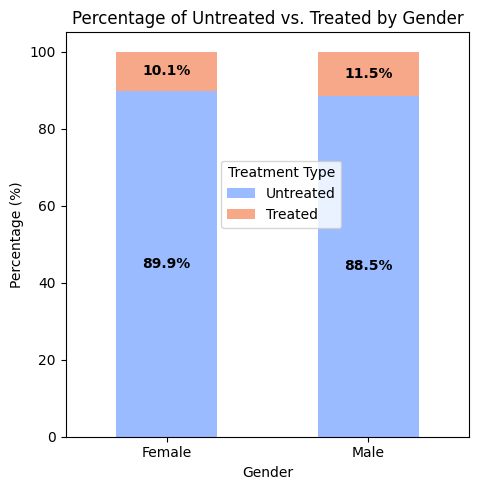

In [73]:
# remove people who are diagnosed at same age as sampling
new_df = df.drop(df[(df['PRIOR_TREATMENT_CATEGORY'] == "Untreated") & (df['AGE'] == df['AGE_SAMPLING'])].index)
new_df = new_df.dropna(subset=["PRIOR_TREATMENT_CATEGORY"])
new_df = new_df[new_df['PRIOR_TREATMENT_CATEGORY'] != "Unknown"]
new_df["PRIOR_TREATMENT_CATEGORY"] = new_df["PRIOR_TREATMENT_CATEGORY"].apply(lambda x: "Untreated" if x == "Untreated" else "Treated")
gender_counts = new_df.groupby("SEX")["PRIOR_TREATMENT_CATEGORY"].value_counts(normalize=True).unstack() * 100
display(gender_counts)

# Plot as a stacked bar chart
# color = ['#c9d7f0', '#edd1c2'] 
ax = gender_counts[["Untreated", "Treated"]].plot(kind="bar", stacked=True, color = ['#9abbff', '#f7a889'], figsize=(5, 5), )

# Add percentage labels inside bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.annotate(f'{height:.1f}%',  # Format as percentage
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Centered position
                        ha='center', va='center', fontsize=10, fontweight='bold', color='black')

txt = "Percentage of Untreated vs. Treated by Gender"
plt.title(txt)
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Treatment Type", bbox_to_anchor=(0.7, 0.7))
plt.tight_layout()
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/untreated_gender.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_68476/3235813125.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=new_df, x="PRIOR_TREATMENT_CATEGORY", y="AGE", palette="coolwarm")


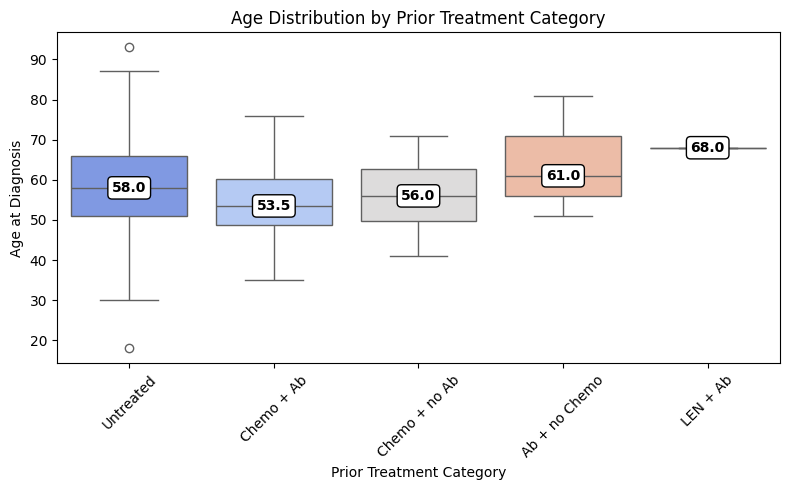

In [74]:
# remove people who are diagnosed at same age as sampling
new_df = df.drop(df[(df['PRIOR_TREATMENT_CATEGORY'] == "Untreated") & (df['AGE'] == df['AGE_SAMPLING'])].index)
new_df = new_df.dropna(subset=["PRIOR_TREATMENT_CATEGORY"])
new_df = new_df[new_df['PRIOR_TREATMENT_CATEGORY'] != "Unknown"]
# display(df[df['PRIOR_TREATMENT_CATEGORY'] == 'Rel/Ref'])
new_df = new_df[new_df["PRIOR_TREATMENT_CATEGORY"] != 'Rel/Ref']

# if new_df['PRIOR_TREATMENT_CATEGORY'] is not Untreated, change it to treated
# new_df['PRIOR_TREATMENT_CATEGORY'] = new_df['PRIOR_TREATMENT_CATEGORY'].apply(lambda x: "Untreated" if x == "Untreated" else "Treated")

plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=new_df, x="PRIOR_TREATMENT_CATEGORY", y="AGE", palette="coolwarm")

# Get the correct order of categories from the plot
categories = [tick.get_text() for tick in ax.get_xticklabels()]

# Calculate medians in the correct order
medians = new_df.groupby("PRIOR_TREATMENT_CATEGORY")["AGE"].median().reindex(categories)

# Annotate median values on the median lines
for i, category in enumerate(categories):  
    median_value = medians[category]  
    ax.text(i, median_value, f"{median_value:.1f}", 
            ha='center', va='center', fontsize=10, fontweight='bold', color="black", 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation=45)
txt = "Age Distribution by Prior Treatment Category"
plt.title(txt)
plt.xlabel("Prior Treatment Category")
plt.ylabel("Age at Diagnosis")
plt.tight_layout()
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/untreated_age.png", dpi=300, bbox_inches="tight")
plt.show()

PRIOR_TREATMENT_CATEGORY,Treated,Untreated
COHORT,,
DFCI,20.987654,79.012346
GCLLSG,NaN,100.000000
ICGC,3.735632,96.264368
MDACC,100.000000,NaN
NHLBI,32.352941,67.647059
UCSD,NaN,100.000000


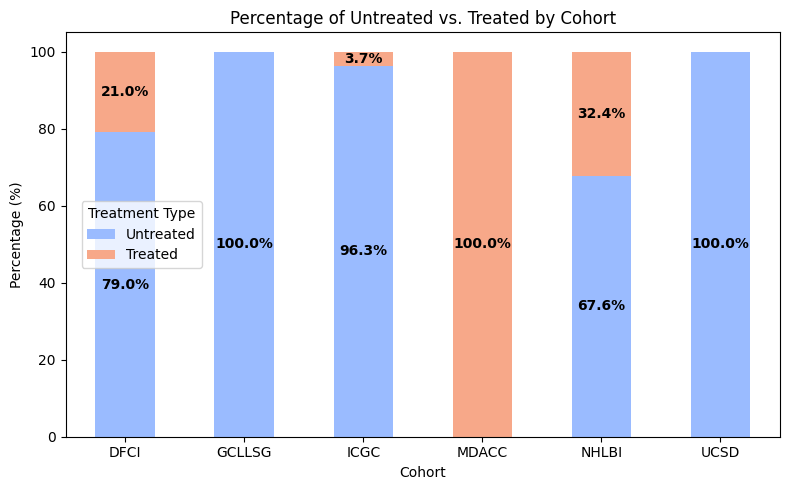

In [75]:
# remove people who are diagnosed at same age as sampling
new_df = df.drop(df[(df['PRIOR_TREATMENT_CATEGORY'] == "Untreated") & (df['AGE'] == df['AGE_SAMPLING'])].index)
new_df = new_df.dropna(subset=["PRIOR_TREATMENT_CATEGORY"])
new_df = new_df[new_df['PRIOR_TREATMENT_CATEGORY'] != "Unknown"]
new_df["PRIOR_TREATMENT_CATEGORY"] = new_df["PRIOR_TREATMENT_CATEGORY"].apply(lambda x: "Untreated" if x == "Untreated" else "Treated")
gender_counts = new_df.groupby("COHORT")["PRIOR_TREATMENT_CATEGORY"].value_counts(normalize=True).unstack() * 100
display(gender_counts)

for org in ['GCLLSG', 'MDACC', 'UCSD']:
    if new_df[(new_df['PRIOR_TREATMENT_CATEGORY']=='Untreated') & (new_df['COHORT'] == 'MDACC')].shape[0] != 0:
        print("Issue in", org)

# Plot as a stacked bar chart
ax = gender_counts[["Untreated", "Treated"]].plot(kind="bar", stacked=True, color = ['#9abbff', '#f7a889'], figsize=(8, 5), )

# Add percentage labels inside bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.annotate(f'{height:.1f}%',  # Format as percentage
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Centered position
                        ha='center', va='center', fontsize=10, fontweight='bold', color='black')
            
txt = "Percentage of Untreated vs. Treated by Cohort"
# txt = "Figure 6. Percentage of Untreated vs. Treated by Cohort"
plt.title(txt)
plt.xlabel("Cohort")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Treatment Type", bbox_to_anchor=(0.2, 0.4))
plt.tight_layout()
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../data/EDA_Images/untreated_cohort.png", dpi=300, bbox_inches="tight")
plt.show()